In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
def to_snake_case(item):
    """Convert input string to 'snake_case' format."""
    regex = r'(?<!^)(?=[A-Z])'
    return re.sub(regex, '_', item).lower()


def print_scatterplot(x, y, xlabel, ylabel):
    # Polynomial of degree 1 that fits the 'x' and 'y' array points
    pol = np.poly1d(np.polyfit(x, y, 1))
    plt.scatter(x, y)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)
    plt.xticks(np.arange(min(x), max(x) + 1, 2.0))
    plt.plot(x, pol(x), "r--")
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.show()

In [3]:
# Download from https://www.fema.gov/about/reports-and-data/openfema/FimaNfipClaims.csv

df = pd.read_csv("FimaNfipClaims.csv", sep=',', low_memory=False)


In [4]:
df.columns = [to_snake_case(item) for item in df.columns]

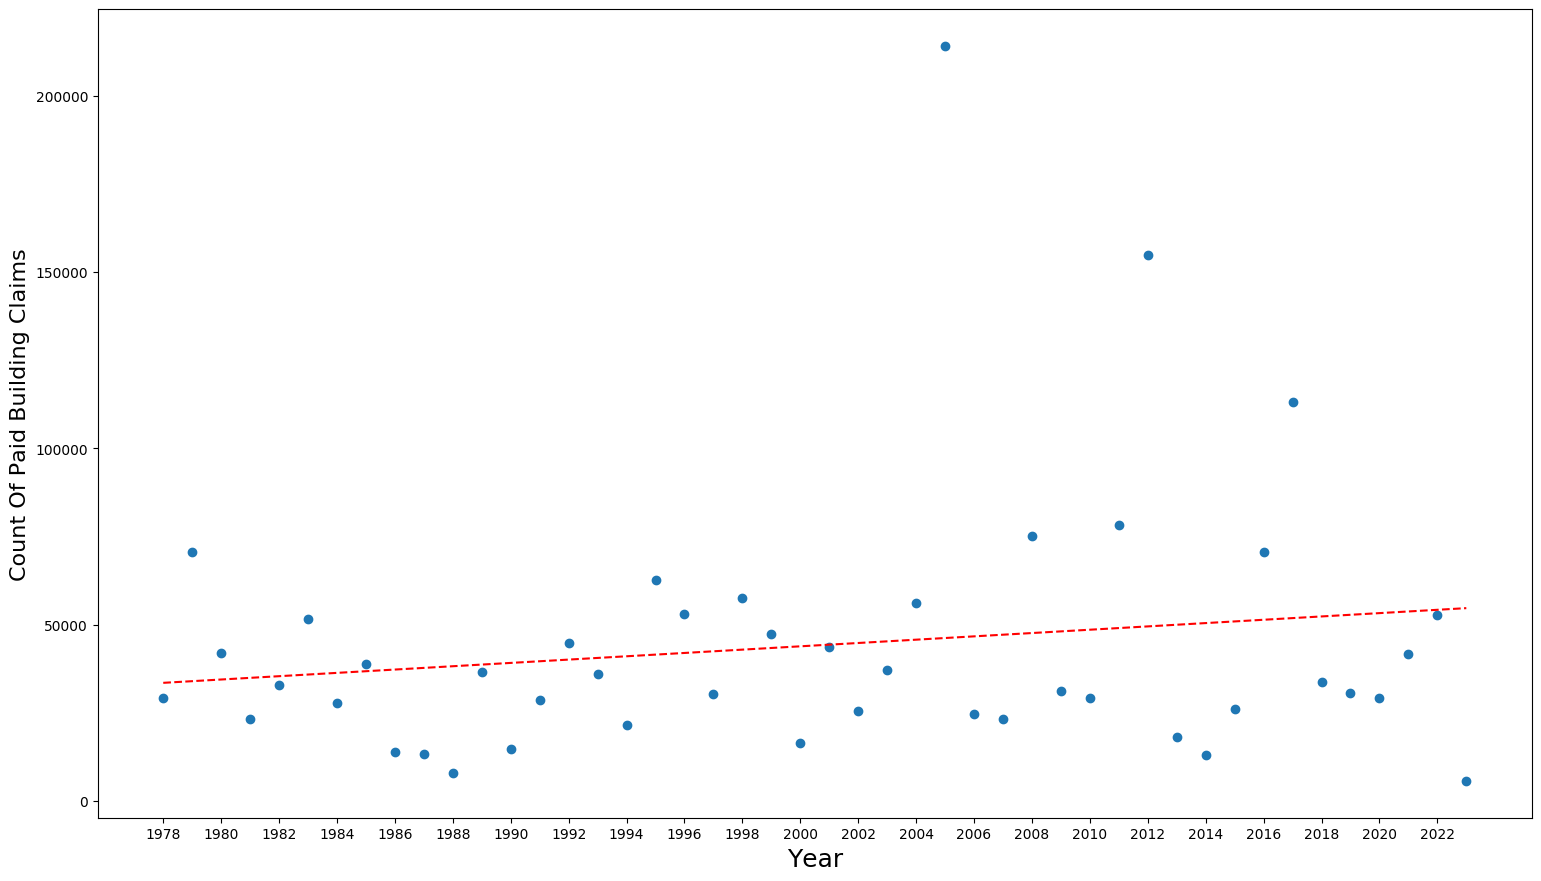

In [5]:
df_apobc = ( # apobc = amount_paid_on_building_claim
    df
    .loc[lambda x: x['amount_paid_on_building_claim'].notna()]
    .groupby(['year_of_loss'])[['amount_paid_on_building_claim']]
    .count()
    .reset_index()
)

print_scatterplot(
    x=df_apobc['year_of_loss'], 
    y=df_apobc['amount_paid_on_building_claim'], 
    xlabel='Year', 
    ylabel='Count Of Paid Building Claims'
)


In [6]:
# 'amount_paid_on_building_claim' values should all valid numbets (no null values)

assert \
    df_apobc.loc[lambda x: x['amount_paid_on_building_claim'].notna()]['amount_paid_on_building_claim'].all(), \
    "There are null values of 'amount_paid_on_building_claim'"


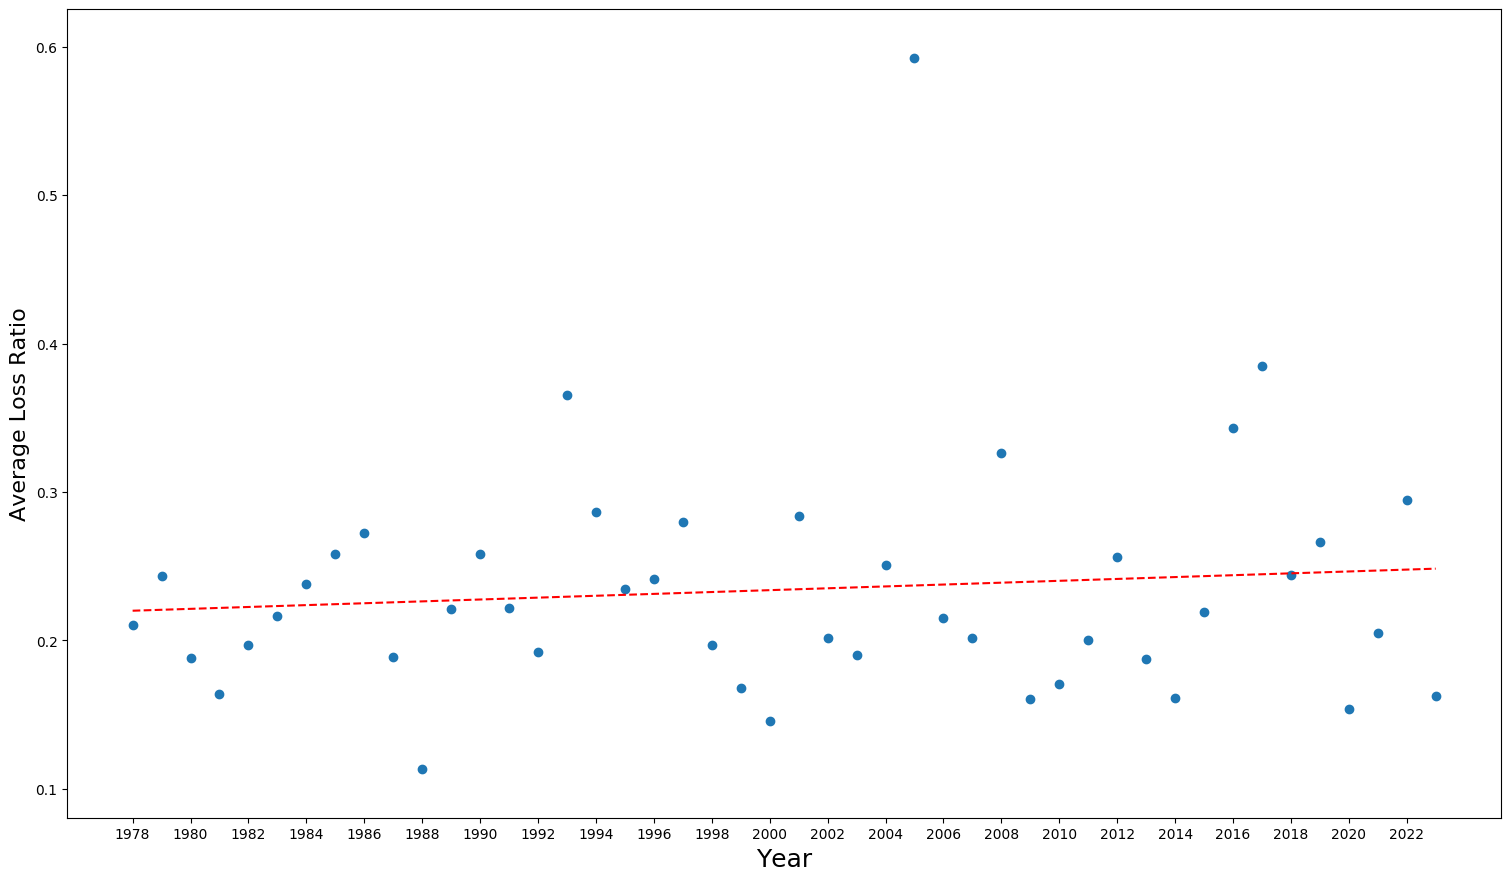

In [7]:
df_lr = ( # lr = loss_ratio
    df
    .assign(
        loss_ratio=lambda x: (
            (x['amount_paid_on_building_claim'] + x['amount_paid_on_contents_claim']) /
            (x['total_building_insurance_coverage'] + x['total_contents_insurance_coverage'])
        )
    )
    .loc[lambda x: x['loss_ratio'].notna()]
    .loc[lambda x: x['loss_ratio'] != np.inf]
    .groupby(['year_of_loss'])['loss_ratio']
    .mean()
    .reset_index()
    # .loc[lambda x: x['loss_ratio'] <= 1]
)
print_scatterplot(
    x=df_lr['year_of_loss'], 
    y=df_lr['loss_ratio'], 
    xlabel='Year', 
    ylabel='Average Loss Ratio'
)


In [8]:
# 'loss_ratio' values should all valid numbets (no null values)

assert df_lr.loc[lambda x: x['loss_ratio'].notna()]['loss_ratio'].all(), "There are null values of 'loss_ratio'"

In [9]:
# 'loss_ratio' values should not be infinite

assert df_lr.loc[lambda x: x['loss_ratio'] != np.inf]['loss_ratio'].any(), "There are infinite values of 'loss_ratio'"
